<center><h1>ML Assignment 3: Evaluation Metrics</h1></center>
<center><h3>Arush Sharma 16BCE1127</h3></center>

<h4>Reading the dataset</h4> 

In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [540]:
data=pd.read_csv("mushroom.csv")

<h4>Displaying all columns in the dataset</h4>

In [541]:
list(data)

['class',
 'capshape',
 'capsurface',
 'capcolor',
 'bruises',
 'odor',
 'gillattach',
 'gillspace',
 'gillsize',
 'gillcolor',
 'stalkshape',
 'stalkroot',
 'stalksurfar',
 'stalksurfbr',
 'stalkcolorar',
 'stalkcolorbr',
 'veiltype',
 'veilcolor',
 'ringnumber',
 'ringtype',
 'sporeprint',
 'pop',
 'habitat']

<h4>Changing the categorical data from alphabets to numbers</h4> 

In [542]:
newcategory={"class":{"e":0,"p":1},
             "capshape":{"x":0,"f":1,"k":2,"b":3,"s":4,"c":5},
             "capsurface":{"y":0,"s":1,"f":2,"g":3},
             "capcolor":{"n":0,"g":1,"e":2,"y":3,"w":4,"b":5,"p":6,"c":7,"u":8,"r":9},
             "bruises":{"f":0,"t":1},
             "odor":{"n":0,"f":1,"s":2,"y":3,"l":4,"a":5,"p":6,"c":7,"m":8},
             "gillattach":{"f":0,"a":1},
             "gillspace":{"c":0,"w":1},
             "gillsize":{"b":0,"n":1},
             "gillcolor":{"b":0,"p":1,"w":2,"n":3,"g":4,"h":5,"u":6,"k":7,"e":8,"y":9,"o":10,"r":11},
             "stalkshape":{"t":0,"e":1},
             "stalkroot":{"b":0,"?":1,"e":2,"c":3,"r":4},
             "stalksurfar":{"s":0,"k":1,"f":2,"y":3},
             "stalksurfbr":{"s":0,"k":1,"f":2,"y":3},
             "stalkcolorar":{"w":0,"p":1,"g":2,"n":3,"b":4,"o":5,"e":6,"c":7,"y":8},
             "stalkcolorbr":{"w":0,"p":1,"g":2,"n":3,"b":4,"o":5,"e":6,"c":7,"y":8},
             "veiltype":{"p":0},
             "veilcolor":{"w":0,"o":1,"n":2,"y":3},
             "ringnumber":{"o":0,"t":1,"n":2},
             "ringtype":{"p":0,"e":1,"l":2,"f":3,"n":4},
             "sporeprint":{"w":0,"n":1,"k":2,"h":3,"r":4,"u":5,"o":6,"b":7,"y":8},
             "pop":{"v":0,"y":1,"s":2,"n":3,"a":4,"c":5},
             "habitat":{"d":0,"g":1,"p":2,"l":3,"u":4,"m":5,"w":6}}

data.replace(newcategory,inplace=True)

<h4>Choosing the value of X and y</h4>

In [543]:
#X=data[['capshape','capsurface','capcolor','bruises','odor']]
X=data[['capsurface','capshape','capcolor','odor','pop']]
y=data['class']

<h4>Splitting the data into train and test data(50% Split)</h4>

In [544]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

<h4>Fitting a LogisticRegression Classifier on the data given</h4>

In [545]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [546]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h4>Predicting the on test data</h4>

In [547]:
y_predict=model.predict(X_test)

<h3>Evaluation Metric 1: Accuracy</h3>

In [548]:
from sklearn.metrics import accuracy_score

In [549]:
print(accuracy_score(y_predict,y_test))

0.7483998030526834


<h4>Null Accuracy</h4>

In [550]:
for i in set(y_predict):
    print(str(i)+": "+str(list(y_predict).count(i)))

0: 1917
1: 2145


In [551]:
y_test.mean()

0.48670605612998524

In [552]:
1 - y_test.mean()

0.5132939438700148

In [553]:
max(y_test.mean(), 1 - y_test.mean())

0.5132939438700148

<h3>Evaluation Metric 2: Confusion Matrix</h3>

In [554]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion=confusion_matrix(y_predict,y_test)
print(confusion)

[[1490  427]
 [ 595 1550]]


In [555]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

<h4>Sub metric 1: Accuracy Calculated from Confusion Matrix</h4>

In [556]:
print((TP + TN) / float(TP + TN + FP + FN))

0.7483998030526834


<h4>Sub metric 2: Classification Error calculated from Confusion Matrix</h4>

In [557]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.2516001969473166


<h4>Sub metric 3: Sensitivity</h4>

In [558]:
sensitivity = TP / float(FN + TP)
print(sensitivity)

0.7226107226107226


<h4>Sub metric 4: Specificity</h4>

In [559]:
specificity = TN / (TN + FP)
print(specificity)

0.7772561293688054


<h4>Sub metric 5: False Positive Rate</h4>

In [560]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.22274387063119458
0.2227438706311946


<h4>Sub metric 6: Precision</h4>

In [561]:
precision = TP / float(TP + FP)
print(precision)

0.7840161861406171


<h3>Evalution Metric 3: Classification Threshold</h3>

<h4>Sub-metric 1: Histogram of predicted probabilites</h4>

In [562]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

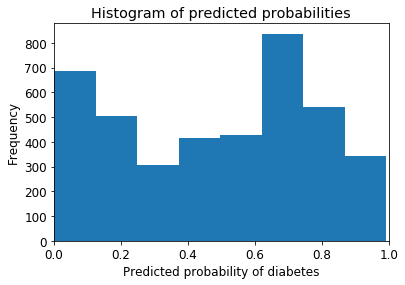

In [563]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [564]:
model.predict(X_test)[0:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [565]:
model.predict_proba(X_test)[0:10]

array([[0.94581099, 0.05418901],
       [0.12185282, 0.87814718],
       [0.34534039, 0.65465961],
       [0.7650441 , 0.2349559 ],
       [0.20104947, 0.79895053],
       [0.13822764, 0.86177236],
       [0.87889456, 0.12110544],
       [0.56553356, 0.43446644],
       [0.54950054, 0.45049946],
       [0.78967082, 0.21032918]])

In [566]:
model.predict_proba(X_test)[0:10, 1]

array([0.05418901, 0.87814718, 0.65465961, 0.2349559 , 0.79895053,
       0.86177236, 0.12110544, 0.43446644, 0.45049946, 0.21032918])

In [567]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.05418901, 0.87814718, 0.65465961, ..., 0.63782734, 0.05610736,
       0.1172408 ])

In [568]:
plt.rcParams['font.size'] = 12

<h4>Defining a function that accepts a threshold and prints sensitivity and specificity</h4>

In [569]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

<h4>Evaluating on default threshold(0.5)</h4>

In [570]:
evaluate_threshold(0.5)

Sensitivity: 0.7840161861406171
Specificity: 0.7146282973621103


<h4>Evaluating on 0.61 threshold</h4>

In [571]:
evaluate_threshold(0.61)

Sensitivity: 0.7774405665149215
Specificity: 0.8997601918465228


<h4>Making the threshold at 0.61 using binarize function</h4>

In [572]:
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.61 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize([y_pred_prob], 0.61)[0]

<h4>Printing probabilities of first 10 X_test data</h4>

In [573]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.05418901, 0.87814718, 0.65465961, 0.2349559 , 0.79895053,
       0.86177236, 0.12110544, 0.43446644, 0.45049946, 0.21032918])

<h4>Printing the confusion matrix at 0.5 threshold level</h4>

In [574]:
print(confusion)

[[1490  427]
 [ 595 1550]]


<h4>Printing the confusion matrix at 0.61 threshold level</h4>

In [575]:
confusion2=metrics.confusion_matrix(y_test, y_pred_class)
print(confusion2)

[[1876  209]
 [ 440 1537]]


In [576]:
TP2 = confusion2[1, 1]
TN2 = confusion2[0, 0]
FP2 = confusion2[0, 1]
FN2 = confusion2[1, 0]

<h4>Sub metric 1: Accuracy Calculated from new Confusion Matrix</h4>

In [577]:
print((TP2 + TN2) / float(TP2 + TN2 + FP2 + FN2))

0.8402264894140817


<h4>Sub metric 2: Classification Error from new Confusion Matrix</h4>

In [578]:
classification_error2 = (FP2 + FN2) / float(TP2 + TN2 + FP2 + FN2)
print(classification_error2)

0.15977351058591827


<h4>Sub metric 3: Sensitivity from new Confusion Matrix</h4>

In [579]:
sensitivity2 = TP2 / float(FN2 + TP2)

print(sensitivity2)

0.7774405665149215


<h4>Sub metric 4: Specificity from new Confusion Matrix</h4>

In [580]:
specificity2 = TN2 / (TN2 + FP2)

print(specificity2)

0.8997601918465228


<h4>Sub metric 5: False Positive Rate from new Confusion Matrix</h4>

In [581]:
false_positive_rate2 = FP2 / float(TN2 + FP2)
print(1 - specificity2)

0.10023980815347722


<h3>Evaluation Metric 4: ROC Curve</h3>

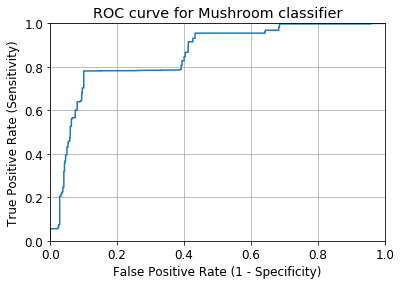

In [582]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Mushroom classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

<h3>Evaluation Metric 5: AUC Score</h3>

In [583]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8573182728475792


<h4>calculate cross-validated AUC</h4>

In [584]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.851044962960915